# 《泰坦尼克号》数据科学解决方案

---

### 我已经发布了一个新的 Python 包 [Speedml](https://speedml.com), 它将该 notebook 中的使用的技术编译成一个 intuitive（直观的），powerful（功能强大的）且 productive（高效的）API.

### Speedml 帮助我在 Kaggle 排行榜上从最低的 80% 跳到最高的 20%, 迭代的次数很少.

### 还有一件事...Speedml 实现了这一点, 代码行数减少了近 70%!

### 下载并且运行代码 [Speedml 版本的泰坦尼克号解决方案](https://github.com/Speedml/notebooks/blob/master/titanic/titanic-solution-using-speedml.ipynb).

---

该 notebook 是 [Data Science Solutions](https://startupsci.com) 书籍的一个手册. 该 notebook 引导我们通过一个典型的工作流程来解决像 Kaggle 这样类似的网站的数据科学竞赛.

有几个优秀的 notebooks 可以用来研究数据科学竞赛作品.
然而许多手册将会跳过一些关于如何开发解决方案的解释, 因为这些 notebooks 是专门为这些专家开发的.
该 notebook 的目标是遵循一步一步的工作流程, 解释我们在解决方案开发过程中所做的每一个决策的每个步骤和理由.

## 工作流阶段

1. 问题或问题的定义.
2. 获取 training（训练）和 testing（测试）数据.
3. Wrangle（整理）, prepare（准备）, cleanse（清洗）数据
4. Analyze（分析）, identify patterns 以及探索数据.
5. Model（模型）, predict（预测）以及解决问题.
6. Visualize（可视化）, report（报告）和提出解决问题的步骤以及最终解决方案.
7. 提供或提交结果.

该工作流指出了，每个阶段如何遵循另一个阶段的常见顺序.
但是也有例外的场景.

- 我们可能结合多个工作流阶段. 我们可以通过可视化数据进行分析.
- 比 indicated（说明）更早的进行一个阶段. 我们可能在 wrangling（整理）过程的前后来分析数据.
- 在我们的工作流程中多次执行一个阶段. 可视化阶段可能被使用多次.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.


## 问题和问题定义

像 Kaggle 这样的竞赛网站, 它们会定义要解决或质疑的问题, 同时提供用于训练数据科学模型和根据测试数据集测试模型结果的数据集,（即, 训练集 和 测试集）.
针对《泰坦尼克号生存竞赛》的问题或定义在 [这里是 Kaggle 描述](https://www.kaggle.com/c/titanic) 中有描述.

> 从泰坦尼克号的灾难中幸存下来或没有幸存的乘客的样本训练集（train.csv）中，如果测试数据集（test.csv）中的这些乘客幸存下来，我们的模型是否可以基于给定的测试数据集（test.csv）来确定。

我们也可能希望对我们问题的领域有所了解.
这在 [Kaggle 竞赛描述](https://www.kaggle.com/c/titanic) 页面有详细的描述.
以下是要注意的事项.

- 1912年4月15日, 在首航期间, 泰坦尼克号撞上一座冰山后沉没, 2224 名乘客和机组人员中有 1502 人遇难. 生成率解释为 32%.
- 还难导致生命损失的原因之一是没有足够的救生艇给乘客和船员.
- 尽管幸存下来的运气有一些因素, 但一些人比其他人更有可能幸存下来，比如妇女, 儿童和上层阶级.

## 工作流目标

数据科学解决方案工作流程有以下七个主要的目标.

**Classifying（分类）.** 我们可能想对我们的样本进行分类或加以类别. 我们也可能想要了解不同类别与解决方案目标的含义或相关性.

**Correlating（相关）.** 可以根据训练数据集中的可用特征来处理这个问题. 数据集中的哪些特征对我们的解决方案目标有重大贡献？从统计学上讲, 特征和解决方案的目标中有一个[相关](https://en.wikiversity.org/wiki/Correlation)？随着特征值的改变, 解决方案的状态也会随之改变, 反之亦然？这可以针对给定数据集中的数字和分类特征进行测试. 我们也可能想要确定以后的目标和工作流程阶段的生存以外的特征之间的相关性. 关联某些特征可能有助于创建, 完善或纠正特征。

**Converting（转换）.** 对于建模阶段, 需要准备数据. 根据模型算法的选择, 可能需要将所有特征转换为数值等价值. 所以例如将文本分类值转换为数字的值.

**Completing（完整）.** 数据准备也可能要求我们估计一个特征中的任何缺失值. 当没有缺失值时，模型算法可能效果最好.

**Correcting（校正）.** 我们还可以分析给定的训练数据集以找出错误或者可能在特征内不准确的值, 并尝试对这些值进行校正或排除包含错误的样本. 一种方法是检测样本或特征中的任何异常值. 如果对分析没有贡献, 或者可能会显着扭曲结果, 我们也可能完全丢弃一个特征.

**Creating（创建）.** 我们可以根据现有特征或一组特征来创建新特征, 以便新特征遵循 correlation（相关）, conversion（转换）, completeness（完整）的目标.

**Charting（绘图）.** 如何根据数据的性质和解决方案的目标来选择正确的可视化图表工具以及绘图.

In [ ]:
## 重构的发布日期 2017年1月29日

We are significantly refactoring the notebook based on (a) comments received by readers, (b) issues in porting notebook from Jupyter kernel (2.7) to Kaggle kernel (3.5), and (c) review of few more best practice kernels.

### 用户评论

- Combine training and test data for certain operations like converting titles across dataset to numerical values. (thanks @Sharan Naribole)
- Correct observation - nearly 30% of the passengers had siblings and/or spouses aboard. (thanks @Reinhard)
- Correctly interpreting logistic regresssion coefficients. (thanks @Reinhard)

### 移植问题

- Specify plot dimensions, bring legend into plot.


### 最佳实践

- 在项目早期进行特征相关分析.
- 为了可读性, 使用多个图而不是覆盖图.

In [1]:
# 数据分析和整理
import pandas as pd
import numpy as np
import random as rnd

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 机器学习
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 获取数据

Python 的 Pandas 包帮助我们处理我们的数据集.
我们首先将训练和测试数据集收集到 Pandas DataFrame 中.
我们还将这些数据集组合在一起, 在两个数据集上运行某些操作.

In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

## 通过 describing（描述）数据进行分析

在我们的项目早期, Pandas 还帮助描述回答数据集中的以下问题.

**数据集中哪些特征是可用的?**

注意: 直接操作或分析这些特征的名称.
这些特征名称在 [Kaggle 数据页面](https://www.kaggle.com/c/titanic/data) 页面上有描述.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**哪些特征是 categorical（分类的）?**

这些值将样本分成几组相似的样本.
在分类特征中的值是 nominal（标称的）, ordinal（顺序的）或 ratio（比例的）还是 interval based（基于区间的）值？
除此之外, 这有助于我们选择合适的图表进行可视化.

- Categorical（分类的）: Survived, Sex, and Embarked. Ordinal（顺序的）: Pclass.

**哪些特征是 numerical（数值的）?**

哪些特征是数值的？
这些值随样本而变化.
在数值特征中的值是 discrete（离散的）和 continuous（连续的） 还是 timeseries based（基于时间序列的）？

- Continous（连续的）: Age, Fare. Discrete（离散的）: SibSp, Parch.

In [4]:
# 预览数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**哪些特征是混合的数据类型?**

相同特征中的 numerical（数值的）, alphanumeric（字母数值的）.
这些是校正目标的候选特征.

- Ticket 是numerical（数值的）和 alphanumeric（字母数值的）数据类型的混合类型. Cabin 是 alphanumeric（字母数值的）.

**哪些特征也许包含错误或拼写错误?**

对于一个大型的数据集来说, 这是很难审查的, 但是从较小的数据集中查看一些样本可能会直接告诉我们, 哪些特征可能需要校正.

- Name 特征也许包含错误或拼写错误, 因为有几种方法可以用来描述名称, 包括头衔，圆括号和用于替代或短名称的引号.

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**哪些特征包含 blank（空格）, null（无效的）或 empty values（空值）?**

这些将需要校正.

- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
- Cabin > Age are incomplete in case of test dataset.

**各个特征的数据类型是什么样的?**

在转换的目标时可以帮助我们.

- 7 个特征是 integer 或 floats. 6 个在测试数据集中.
- 5 个特征是 strings (object).

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**样本中数值特征值的分布是什么?**

这有助于我们确定, 除了其他早期的思考, 在实际问题领域的训练数据集是如何具有代表性的.

- 总样本是 891 或者在泰坦尼克号（2,224）上实际旅客的 40%.
- Survived（生存）是一个具有 0 或 1 值的分类特征.
- 大约 38% 样本幸存了下来, 然而实际的幸存率是 32%.
- 大多数旅客 (> 75%) 没有和父母或孩子一起旅行.
- 近 30% 的旅客有兄弟姐妹 和/或 配偶.
- 少数旅客 Fares（票价）差异显著 (<1%), 最高达 $512.
- 很少有年长的旅客 (<1%) 在年龄范围 65-80.

In [7]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**分类特征的分布是什么样的?**

- Names（名称）特征在数据集中是唯一的 (count=unique=891)
- Sex（性别）变量有两个可能的值, 男性为 65% (top=male, freq=577/count=891).
- Cabin（房间号）值在样本中有重复. 或者几个旅客共享一个客舱.
- Embarked（出发港）有 3 个可能的值. 大多数乘客使用 S 港口(top=S)
- Ticket（船票号码）特征有很高 (22%) 的重复值 (unique=681).

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ekstrom, Mr. Johan",male,CA. 2343,G6,S
freq,1,577,7,4,644


### 基于数据分析的假设

到目前为止, 基于数据分析, 我们得出以下假设.
在采取适当的行动之前, 我们可能会进一步验证这些假设.

**Correlating（相关）.**

我们想知道每个特征与生存相关的程度.
我们希望在项目早期做到这一点, 并将这些快速相关性与项目后期的模型相关性相匹配.

**Completing（完整）.**

1. 我们可能想要去补全丢失的 Age（年龄）特征，因为它肯定与生存相关.
2. 我们也想要去补全丢失的 Embarked（出发港）特征, 因为它也可能与生存或者其它重要的特征相关联.

**Correcting（校正）.**

1. Ticket（船票号码）特征可能会从我们的分析中删除, 因为它包含了很高的重复比例 (22%), 并且票号和生存之间可能没有关联.
2. Cabin（房间号）特征可能因为高度不完整而丢失, 或者在 训练和测试数据集中都包含许多 null 值.
3. PassengerId（旅客ID）可能会从训练数据集中删除, 因为它对生存来说没有贡献.
4. Name（名称）特征是比较不规范的, 可能不直接影响生产, 所以也许会删除.

**Creating（创建）.**

1. 我们可能希望创建一个名为 Family 的基于 Parch 和 SibSp 的新特征，以获取船上家庭成员的总数.
2. 我们可能想要设计 Name 功能以将 Title 抽取为新特征.
3. 我们可能要为 Age（年龄）段创建新的特征. 这将一个连续的数字特征转变为一个顺序的分类特征.
4. 如果它有助于我们的分析, 我们也可能想要创建 Fare（票价）范围的特征。

**Classifying（分类）.**

根据前面提到的问题描述, 我们也可以增加我们的假设.

1. Women (Sex=female) 更有可能幸存下来.
2. Children (Age<?) 更有可能幸存下来. 
3. 上层阶级的旅客 (Pclass=1) 更有可能幸存下来.

## 通过旋转特征进行分析

为了确认我们的一些观察和假设, 我们可以快速分析我们的特征之间的相互关系.
我们只能在这个阶段为没有任何空值的特征做到这一点.
对于 Sex（性别），顺序的（Pclass）或离散的（SibSp，Parch）类型的特征, 这也是有意义的.

- **Pclass** 我们观察到 Pclass = 1 和 Survived（分类＃3）之间的显着相关性（> 0.5）. 我们决定在我们的模型中包含这个特征.
- **Sex** 在 Sex=female（性别=女性）的问题定义中确认了74％（分类＃1）的幸存率非常高的观察意见.
- **SibSp and Parch** 这些特征对于某些值具有零相关性. 从这些单独的特征（创建＃1）派生一个特征或一组特征可能是最好的

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 通过可视化数据进行分析

现在我们可以继续使用可视化分析数据来确认我们的一些假设.

### 关联数值的特征

让我们从理解数值的特征和解决方案目标（生存）之间的相关性开始.

柱状图可用于分析连续的数字变量，如 Age（年龄），其中条带或范围将有助于识别有用的模式.
直方图可以使用自动定义的 bins 或等分范围的 bins 来说明样本的分布.
这有助于我们回答有关特定频段的问题（婴儿有更好的幸存率吗？）

请注意，直方图可视化中的 x 轴表示样本或旅客的数量.

**Observations（观察）.**

- 婴儿（4 岁以下）存活率高.
- 最老的乘客（年龄= 80）幸存下来.
- 大量的 15-25 岁的孩子没有幸.
- 大多数乘客在 15-35 年龄范围内.

**Decisions（决策）.**

这个简单的分析证实了我们的假设, 作为后续工作流程阶段的决策.

- 在我们的模型训练中, 我们应该考虑年龄（我们假设分类＃2）.
- 完成空值的年龄功能（完成＃1）.
- 我们应该 band（组合）年龄组（创建＃3）.

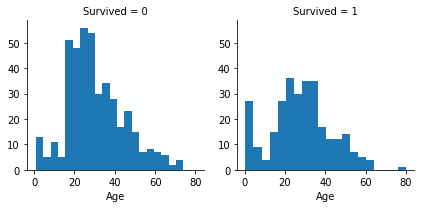

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### 关联数字和顺序的特征

我们可以结合多个特征使用一个图来确定其相关性.
这可以通过具有数字值的数字和分类特征来完成。

**Observations（观察）.**

- Pclass=3 拥有最多的乘客，但大多数没有生存. 确认我们的分类假设 ＃2.
- Pclass=2 和 Pclass = 3 的婴儿乘客大多存活. 进一步限定了我们的分类假设 ＃2.
- Pclass=1 的大多数乘客幸存下来。 确认我们的分类假设 ＃3。
- Pclass 在乘客的年龄分布方面有所不同.

**Decisions（决策）.**

- 考虑 Pclass 用于模型训练.

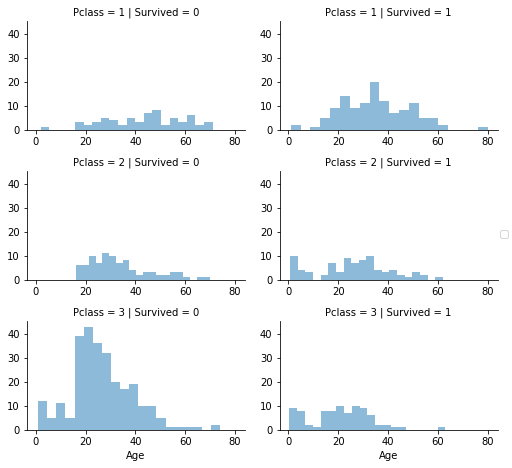

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### 关联分类特征

现在我们可以将分类特征与我们的解决方案目标关联起来.

**Observations（观察）.**

- Female（女性）旅客的幸存率比 male（男性）好得多. 确认分类（＃1）。
- Embarked= C 的例外, 其中男性的成活率较高. 这可能是 Pclass 和 Embarked 之间的相关性, 反过来, Pclass 和 Survived 之间, 不一定是进入和生存直接相关。
- 与 C 和 Q 港口的 Pclass = 2 相比, Pclass = 3 时男性的生存率更高. 完成（＃2）。
- 出发港口的 Pclass=3 和男性乘客的生存率不同. 相关（＃1）。

**Decisions（决策）.**

- 增加 Sex 特征以用于模型训练.
- 补全丢失值并添加 Embarked 特征以用于模型训练.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


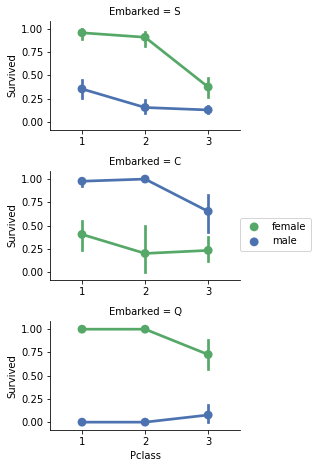

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### 关联分类和数值的特征

我们也可能想要关联分类特征（非数值的）和数值的特征.
我们可以考虑将 Embarked（类别非数字）, Sex（类别非数字）, Fare（数字连续）与生存（分类数字）相关联.

**Observations（观察）.**

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

- 更高的票价付费旅客有更好的生存. 证实我们对创造（＃4）票价范围的假设.
- 搭乘港口与生存率相关. 确认关联（＃1）和完成（＃2）.

**Decisions（决策）.**

- 考虑 banding（绑定）票价功能

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


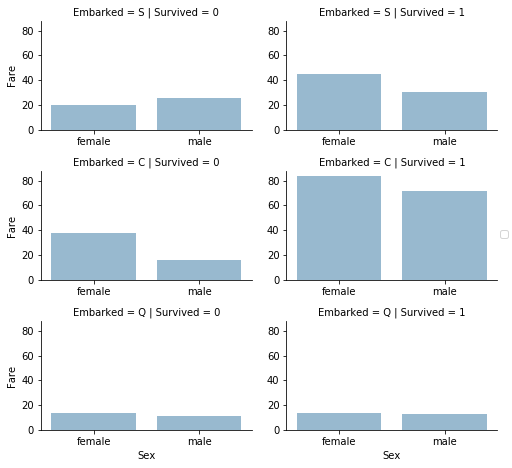

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 整理数据

我们收集了关于我们的数据集和解决方案要求的一些假设和决策.
到目前为止, 我们没有必要改变一个单个的特征或值来达到目标.
让我们现在执行我们的决定和假设来 correcting(校正), creating（创建）和 completing（完整）目标.

### 通过删除特征进行校正

这是一个很好的开始执行目标. 通过丢弃特征, 我们正在处理更少的数据点. 加快我们的 notebook, 并简化分析.

根据我们的假设和决策, 我们要放弃 Cabin（房间号）（更正＃2）和 Ticket（票号）（更正＃1）的特征.

请注意, 如果适用, 我们将对训练和测试数据集进行操作, 以保持一致.

In [17]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### 从现在的提取以创建性特征

我们想要分析一下, Name 特征是否可以被设计来提取 titles（头衔）和 test（测试）头衔和 survival（生存）之间的相关性, 然后再删除Name 和 PassengerId 特征.

在下面的代码中, 我们使用正则表达式提取 Title 特征.  正则表达式`(\w+\.)`匹配 Name 特征中以点号字符结尾的第一个单词.
`expand = False` 标志返回一个 DataFrame.

**Observations（观察）.**

当我们绘制出 Title, Age 和 Survived 的图时, 我们可以发现以下观察.

- 大多数 titles band 年龄组准确. 例如: 硕士学位的年龄平均为 5 年。
- Title 中的生存年龄段略有不同.
- 某些 Title 大多存活（夫人, 女士, 先生）或不（Don, Rev, Jonkheer）.

**Decision（决策）.**

- 我们决定保留模型训练的新 Title 特征.

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


我们可以用更常见的头衔来替换很多头衔, 或者将它们分类为 `Rare`.

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


我们可以将 titles（头衔）转换为顺序的.

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在我们可以放心地从训练和测试数据集中删除 Name 特征.
我们也不需要训练数据集中的 PassengerId 特征.

In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 转换分类的特征

现在我们可以将包含字符串的特征转换为数字值.
这是大多数模型算法所要求的.
这样做也将帮助我们实现特征完成目标.
让我们开始将 Sex（性别）特征转换为名为 Gender（性别）的新特征, 其中 female=1, male=0.

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 完整化数值字连续特征

现在我们应该开始估计和完成缺少或空值的特征.
我们将首先为 Age（年龄）特征执行此操作.

我们可以考虑三种方法来完整化一个数值连续的特征.

1.简单的方法是在平均值和 [标准偏差](https://en.wikipedia.org/wiki/Standard_deviation) 之间生成随机数.

2.更准确地猜测缺失值的方法是使用其他相关特征. 在我们的例子中, 我们注意到 Age（年龄）, Sex（性别）和 Pclass 之间的相关性. 猜测年龄值使用 [中位数](https://en.wikipedia.org/wiki/Median) Age 中的各种 Pclass 和 Gender 特征组合的值. 因此, Pclass=1 和 Gender=0，Pclass=1 和 Gender=1 的年龄中位数等等...

3.结合方法 1 和 2. 因此. 不要根据中位数来猜测年龄值, 而应根据 Pclass 和 Sex 组合, 使用平均数和标准差之间的随机数.

方法 1 和 3 将在我们的模型中引入随机噪声. 多次执行的结果可能会有所不同. 我们更喜欢方法 2.

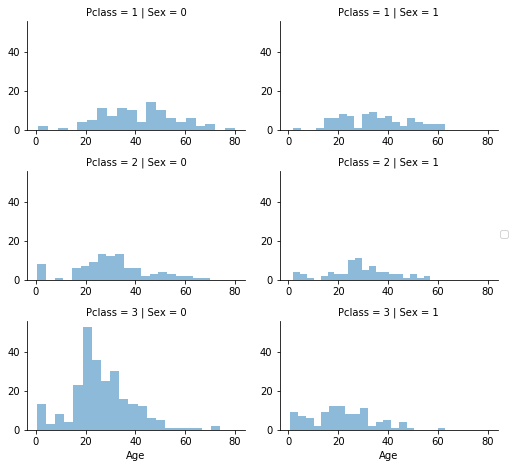

In [23]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

让我们开始准备一个空数组, 以包含基于 Pclass x Gender 组合以猜测 Age 值.

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

现在我们迭代 Sex（0 或 1）和 Pclass（1, 2, 3）来计算 6 个组合的 Age 的猜测值.

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


让我们创建年龄段并确定与 Survived 的相关性.

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


让我们使用年龄段的顺序值来替换 Aage.

In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


我们不能删除 AgeBand 特征.

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 结合现有特征创建新特征

我们可以为 Parch 和 SibSp 结合的 FamilySize 创建一个新的特征.
这将使我们能够从我们的数据集中删除 Parch 和 SibSp.

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


我们可以创建另一个名为 IsAlone 特征.

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


让我们放弃 Parch, SibSp 和 FamilySize 特征, 转而使用 IsAlone 特征.

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


我们还可以创建一个结合 Pclass 和 Age 的人造特征.

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### 完整化分类特征

Embarked（出发港）特征有 S, Q, C 三个基于出发港口的值.
我们的训练集有两个丢失值.
我们简单的使用最常发生的情况来填充它.

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### 转换分类特征为数值的

我们现在可以通过创建一个新的数字港特征来转换 EmbarkedFill 特征.

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### 快速完整化兵转换数值的特征

现在，我们可以在测试数据集使用模式下为单个缺失值完整化票价特征, 以获取此特征最常出现的值. 我们用一行代码来完成.

请注意, 我们并没有创建中间用的新特征, 也没有对相关性进行任何进一步的分析以猜测丢失的特征, 因为我们只替换单个值. 完成目标达到了模型算法对非空值操作的期望要求.

我们可能还想把票价四舍五入到小数点后两位, 因为它代表货币.

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


我们不创建 FareBand 特征.

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


将 Fare 特征转换为基于 FareBand 的顺序值.

In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


并且测试数据集也一样.

In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 模型, 预测和解决方案

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [41]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.359999999999999

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.840000000000003

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.739999999999995

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.280000000000001

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.0

In [47]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.010000000000005

In [48]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


75.760000000000005

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [49]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.760000000000005

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [50]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.760000000000005

### 模型评估

现在, 我们可以对所有模型进行评估, 为我们的问题选择最好的模型.
虽然决策树和随机森林评分相同, 但我们选择使用随机森林，因为它们会过度的调整决策树以适应他们的训练集的习惯.

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.00
6,Stochastic Gradient Decent,75.76
4,Naive Bayes,72.28


In [52]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

我们提交给竞争网站 Kaggle 的比赛结果是在 6,082 个参赛作品中获得 3883 个.
这一结果表明，竞争正在进行.
这个结果只占提交数据集的一部分.
对我们的第一次尝试不坏.
任何提高我们的分数的建议是受我们欢迎的.

## 参考文献

这手册是基于完成解决泰坦尼克号竞赛和其它来源的伟大工作而创建的.

- [泰坦尼克号之旅](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [ Pandas 入门指南: Kaggle 的泰坦尼克号竞赛](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [泰坦尼克号的最佳处理分类器](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)